# StepStone Data Analysis & Data preparation for SQL Database 

## Install / update dependant packages

In [1]:
!pip3 install --upgrade pandas
!pip3 install snscrape

## Notebook preparation

### Importing Python packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Settings section

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set(rc={'figure.figsize':(8,4), 'font.size': 9})
sns.set_style('ticks')

## Data processing

### Loading data from pickle file

In [4]:
df = pd.read_pickle('tweets_pickle/pickle_data_@stepstone_de.pkl')
df = df.set_index('tweet_id')

### Data preparation for SQL Database

In [5]:
df = df.astype({'lang': 'category', 'source_label': 'category'})
df['has_media'] = df.media.notnull()
df['tweet_len'] = df.text.apply(len)

df = df.drop('media', axis=1)

# df.to_sql(name='stepstone_tweets_archive, con=conncetion', schema=schema)

df

tweet_created_at                                               text              user_id     user_name           user_created_at  user_favourites_count  user_followers_count  user_friends_count user_location  user_is_verified hashtags lang  tweet_like_count                                    mentioned_users         source_label  tweet_quote_count  tweet_reply_count  retweet_count                                          tweet_url                     in_reply_to_user place  has_media  tweet_len
tweet_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1600496676065640449 2022-12-07 14:25:18+00:00               @worldabc123789 @stepstone_de warum?  1430475073044066308  AXELTISCHER1 2021-08-25 10:20:28+00:00                      9                     0                   1                           False     None   de                 0  [https://twitter.com/worldabc123789, https://t...      Twitter Web App                  0                  0              0  https://twitter.com/AXELTISCHER1/status/160049...   https://twitter.com/worldabc123789  None      False         36
1599068596667236352 2022-12-03 15:50:37+00:00  @stepstone_de Was für eine absurde Behauptung,...  1459103071150219275  ThaddausGraf 2021-11-12 10:17:48+00:00                    184                     0                   2                           False     None   de                 0                 [https://twitter.com/stepstone_de]      Twitter Web App                  0                  0              0  https://twitter.com/ThaddausGraf/status/159906...     https://twitter.com/stepstone_de  None      False        243
1599065179668389888 2022-12-03 15:37:02+00:00  @stepstone_de @DCStudiosProd Glückwunsch steps...  1459103071150219275  ThaddausGraf 2021-11-12 10:17:48+00:00                    184                     0                   2                           False     None   de                 1  [https://twitter.com/stepstone_de, https://twi...      Twitter Web App                  0                  0              0  https://twitter.com/ThaddausGraf/status/159906...     https://twitter.com/stepstone_de  None      False        268
1598342932465164288 2022-12-01 15:47:05+00:00                     @TheOnePistolGuy @stepstone_de  1387089299829559302   xderOptiker 2021-04-27 17:00:43+00:00                   7616                    21                  42                           False     None  qam                 0  [https://twitter.com/TheOnePistolGuy, https://...      Twitter Web App                  0                  0              0  https://twitter.com/xderOptiker/status/1598342...  https://twitter.com/TheOnePistolGuy  None      False         30
1597948674621202432 2022-11-30 13:40:27+00:00  Mit @stepstone_de wäre das nicht passiert http...  1387089299829559302   xderOptiker 2021-04-27 17:00:43+00:00                   7616                    21                  42                           False     None   de                 2                 [https://twitter.com/stepstone_de]  Twitter for Android                  0                  0              0  https://twitter.com/xderOptiker/status/1597948...                                 None  None      False         65
...                                       ...                                                ...                  ...           ...                       ...                    ...                   ...                 ...           ...               ...      ...  ...               ...                                               

## Data Analysis

### Top 10 Tweets by amount of likes

In [6]:
top_liked_tweets = df.sort_values('tweet_like_count', ascending = False).head(10)

top_liked_tweets

tweet_created_at                                               text              user_id        user_name           user_created_at  user_favourites_count  user_followers_count  user_friends_count                 user_location  user_is_verified                          hashtags lang  tweet_like_count                                    mentioned_users         source_label  tweet_quote_count  tweet_reply_count  retweet_count                                          tweet_url in_reply_to_user place  has_media  tweet_len
tweet_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
1437336019666354179 2021-09-13 08:43:06+00:00    Chapeau @stepstone_de 😂 https://t.co/KgP1d7kQ0c  1229483820732362752  green_clarity99 2020-02-17 19:12:53+00:00                 247101                  3119                2686        somewhere in Thüringen             False                              None   fr               202                 [https://twitter.com/stepstone_de]  Twitter for Android                  2                  3             16  https://twitter.com/green_clarity99/status/143...             None  None       True         47
1436584753168326656 2021-09-11 06:57:50+00:00  Wenn schon Firmen beginnen, über die #NieMehrC...             95520372      DoktorAgony 2009-12-08 22:52:44+00:00                  47440                   674                 689    N 52°7' 0'' / E 11°37' 0''             False                      [NieMehrCDU]   de               162                 [https://twitter.com/stepstone_de]      Twitter Web App                  3                  5             33  https://twitter.com/DoktorAgony/status/1436584...             None  None       True        151
1506894475980943363 2022-03-24 07:23:34+00:00  Die Zeitschrift @msmagazin und @stepstone_de m...           2326802568     VDS_weltweit 2014-02-04 09:24:47+00:00                  10007                 12434                 463                      Dortmund             False                              None   de               124  [https://twitter.com/msmagazin, https://twitte...   Twitter for iPhone                  1                  3             16  https://twitter.com/VDS_weltweit/status/150689...             None  None       True        270
1400070889937551361 2021-06-02 12:44:46+00:00  800.000 Menschen arbeiten in der Autoindustrie...            103121268    _Katja_Diehl_ 2010-01-08 23:48:11+00:00                 258221                 51653                4578  Planet mit Klimakatastrophe.             False              [Schlüsselindustrie]   de               108                 [https://twitter.com/stepstone_de]      Twitter Web App                  1                  5             35  https://twitter.com/_Katja_Diehl_/status/14000...             None  None      False        276
1359065733951598592 2021-02-09 09:04:55+00:00  Danke, @stepstone_de. Ich melde mich gegebenen...             25203196         diktator 2009-03-19 01:07:49+00:00                  38209                 64170                1351                        Berlin              True                              None   de                91                 [https://twitter.com/stepstone_de]      Twitter Web App                  0                  3              0  https://twitter.com/diktator/status/1359065733...             None  None       True         76
1243461910298853376 2020-03-27 08:56:36+00:00  Vielen Dank für die vielen netten Nachrichten ...            553954755         zunicker 2012-04-14 22:13:26+00:00     

### Tweet by most "Favorable" user

In [7]:
top_user_favourites_tweet = df.sort_values('user_favourites_count',
                                           ascending = False)\
                                            .head(1)\
                                            .transpose()

top_user_favourites_tweet

tweet_id                                             1401967189054345221
tweet_created_at                               2021-06-07 18:19:59+00:00
text                   @Ann_Waeltin @XING_de @XING_ch @MonsterDE @ste...
user_id                                                        451022494
user_name                                                        kiwonka
user_created_at                                2011-12-30 23:20:40+00:00
user_favourites_count                                             678255
user_followers_count                                                 802
user_friends_count                                                  1279
user_location                                 Lübeck, Schleswig-Holstein
user_is_verified                                                   False
hashtags                                                            None
lang                                                                  de
tweet_like_count                                                       1
mentioned_users        [https://twitter.com/Ann_Waeltin, https://twit...
source_label                                             Twitter Web App
tweet_quote_count                                                      0
tweet_reply_count                                                      0
retweet_count                                                          0
tweet_url              https://twitter.com/kiwonka/status/14019671890...
in_reply_to_user                         https://twitter.com/Ann_Waeltin
place                                                               None
has_media                                                          False
tweet_len                                                            115

### Tweet by most "Followed" user

In [8]:
top_user_followers_tweet = df.sort_values('user_followers_count',
                                          ascending = False)\
                                            .head(1)\
                                            .transpose()

top_user_followers_tweet

tweet_id                                             1557020693308530693
tweet_created_at                               2022-08-09 15:07:15+00:00
text                   Während Deffner weiter flittert, hat sich Zsch...
user_id                                                          8720562
user_name                                                           welt
user_created_at                                2007-09-07 10:16:29+00:00
user_favourites_count                                               2079
user_followers_count                                             1844424
user_friends_count                                                   273
user_location                                                     Berlin
user_is_verified                                                    True
hashtags                                                            None
lang                                                                  de
tweet_like_count                                                      21
mentioned_users        [https://twitter.com/Schuldensuehner, https://...
source_label                                             Twitter Web App
tweet_quote_count                                                      0
tweet_reply_count                                                      4
retweet_count                                                          6
tweet_url              https://twitter.com/welt/status/15570206933085...
in_reply_to_user                                                    None
place                                                               None
has_media                                                          False
tweet_len                                                            278

### Average, Minimal and Maximal tweet length's

In [9]:
avg_tweet_len = int(df.tweet_len.mean().round())
smallest_tweet_len = int(df.tweet_len.min())
largest_tweet_len = int(df.tweet_len.max())

smallest_tweet_len, largest_tweet_len, avg_tweet_len

(4, 413, 167)

### Average, Minimal and Maximal tweet length's

In [10]:
df.tweet_len.describe().round()

count    6021.0
mean      167.0
std        75.0
min         4.0
25%       115.0
50%       139.0
75%       230.0
max       413.0
Name: tweet_len, dtype: float64

### Plots & Graphs

#### Engagement periods: Distribution of tweets throughout the archive

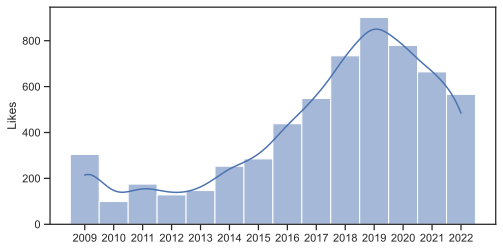

In [11]:
df['tweet_created_at_year'] = df.tweet_created_at.dt.strftime('%Y')
engagement_plot = sns.histplot(data=df.sort_values(by='tweet_created_at_year'), x='tweet_created_at_year', kde=True)
engagement_plot.set_xlabel('')
engagement_plot.set_ylabel('Likes')

plt.show(engagement_plot)

#### Tweet length & amount of likes 

In [12]:
scatter_plot = sns.scatterplot(data=df,
                               x='tweet_created_at', y='tweet_like_count',
                               hue='tweet_len', size='tweet_len',
                               linewidth=0, alpha = 0.7)
scatter_plot.set_xlabel('')
scatter_plot.set_ylabel('Likes')
plt.legend(title='Tweet Length', loc='upper left')

plt.show(scatter_plot)

#### Tweets by Twitter Sources

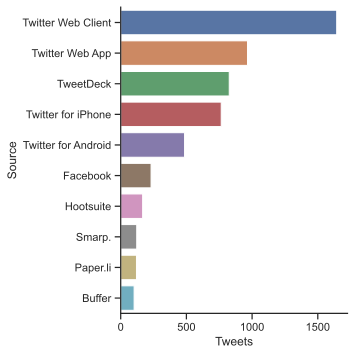

In [13]:
cat_plot = sns.catplot(data=df, y='source_label', x=None, kind='count',
                       order=df.source_label.value_counts().head(10).index)

cat_plot.set_axis_labels('Tweets', 'Source')

plt.show(cat_plot)

#### Users with most @stepstone_de mentions

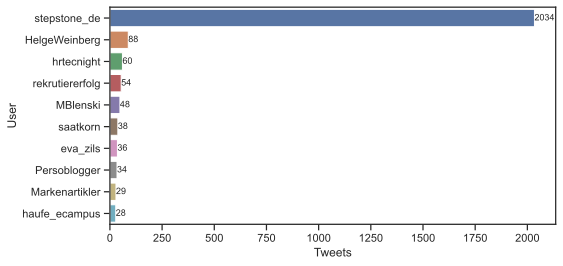

In [14]:
user_activity_df = df.user_name.value_counts().head(10).to_frame().reset_index().rename(columns={'index': 'user_name', 'user_name': 'count'})

user_activity_plot0 = sns.barplot(data=user_activity_df, x='count', y='user_name')
user_activity_plot0.bar_label(user_activity_plot0.containers[0])
user_activity_plot0.set_xlabel('Tweets')
user_activity_plot0.set_ylabel('User')

plt.show(user_activity_plot0)

#### Users with most @stepstone_de mentions

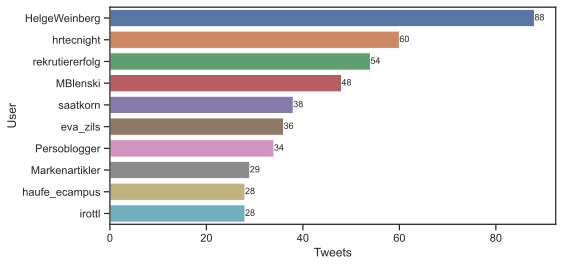

In [15]:
user_activity_df1 = df.user_name.value_counts().iloc[1:11].to_frame().reset_index().rename(columns={'index': 'user_name', 'user_name': 'count'})

user_activity_plot1 = sns.barplot(data=user_activity_df1, x='count', y='user_name')
user_activity_plot1.bar_label(user_activity_plot1.containers[0])
user_activity_plot1.set_xlabel('Tweets')
user_activity_plot1.set_ylabel('User')

plt.show(user_activity_plot1)